데이터를 항상 연속형으로 수집할 수는 없다.  
측정된 데이터는 측정오차로 같은 시간 간격으로 측정해도 매번 다르게 나오게 된다.  
그래서 중간의 어떤 값을 재차 실험하지 않고 과학적으로 추정할 필요가 있다.

그리고 등간격일 때의 보간법과 등간격이 아닐 때의 내삽법은 따로 있어야 할 것이다.

# GPT 해설

### 보간법 (Interpolation)

**보간법**은 주어진 데이터 포인트들 사이에 있는 값을 추정하는 방법입니다. 즉, 두 점 사이의 값을 추정하거나, 이 점들 사이에서 연속적인 함수를 정의하는 것입니다. 여기서는 **테일러 급수 보간법**, **라그랑지 다항식 보간법**, 그리고 **3차 스플라인 보간법**에 대해 설명하겠습니다.

---

### 1. **테일러 급수 보간법 (Taylor Series Interpolation)**

#### 개념:
**테일러 급수**는 함수 $ f(x) $를 주어진 점에서 그 근처의 값을 다항식으로 근사하는 방법입니다. 테일러 급수는 주어진 함수의 미분 값을 사용하여 근처 값을 근사합니다. 함수 $ f(x) $가 주어진 점 $ x_0 $에서 $ n $차까지 미분 가능하다면, 그 점에서 테일러 급수는 다음과 같이 표현됩니다:

$$
f(x) = f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \cdots + \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n
$$

#### 장점:
- 주어진 함수가 미분 가능하다면 매우 좋은 근사 방법입니다.
- 특정 지점 근처에서 함수의 변화를 잘 포착할 수 있습니다.

#### 단점:
- 함수가 극단적으로 변할 때나, 주어진 구간에서 함수의 경향성이 급격히 변할 때는 정확도가 떨어질 수 있습니다.
- 함수의 고차 미분이 존재하지 않으면 이 방법을 적용하기 어렵습니다.

#### 테일러 급수 보간법의 예시:
주어진 함수 $ f(x) = e^x $를 $ x_0 = 0 $에서 테일러 급수로 근사하는 경우:
$$
f(x) \approx 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \cdots
$$

---

### 2. **라그랑지 다항식 보간법 (Lagrange Polynomial Interpolation)**

#### 개념:
**라그랑지 다항식 보간법**은 주어진 여러 개의 데이터 포인트에서 그 사이를 다항식으로 연결하는 방법입니다. $ n $개의 데이터 포인트 $ (x_0, y_0), (x_1, y_1), \dots, (x_n, y_n) $가 주어졌을 때, 이 점들을 통과하는 $ n $차 다항식을 다음과 같은 형식으로 표현할 수 있습니다:

$$
L(x) = \sum_{i=0}^{n} y_i \cdot \ell_i(x)
$$
여기서, 라그랑지 기저 함수 $ \ell_i(x) $는 다음과 같습니다:

$$
\ell_i(x) = \prod_{\substack{0 \le j \le n \\ j \neq i}} \frac{x - x_j}{x_i - x_j}
$$

이 기저 함수는 모든 $ x_i $에서 1이 되고, 나머지 $ x_j $에서는 0이 되도록 설계되어 있습니다. 이를 통해 $ n $개의 주어진 점을 정확히 통과하는 다항식을 구성할 수 있습니다.

#### 장점:
- 주어진 모든 데이터 포인트를 정확하게 통과하는 다항식을 얻을 수 있습니다.
- 함수의 미분 가능 여부에 상관없이 적용할 수 있습니다.

#### 단점:
- 데이터 포인트가 많을수록 **오버피팅** 문제가 발생할 수 있으며, 높은 차수의 다항식에서 계산이 복잡해지고 **런지 현상**(Runge phenomenon, 다항식의 진동성)이 발생할 수 있습니다.
- 높은 차수의 다항식이 필요할수록 계산 복잡도가 매우 커집니다.

#### 라그랑지 다항식 보간법 예시:
세 개의 데이터 포인트 $ (x_0 = 1, y_0 = 1), (x_1 = 2, y_1 = 4), (x_2 = 3, y_2 = 9) $가 주어졌을 때:

$$
L(x) = 1 \cdot \frac{(x - 2)(x - 3)}{(1 - 2)(1 - 3)} + 4 \cdot \frac{(x - 1)(x - 3)}{(2 - 1)(2 - 3)} + 9 \cdot \frac{(x - 1)(x - 2)}{(3 - 1)(3 - 2)}
$$

---

### 3. **3차 스플라인 함수 보간법 (Cubic Spline Interpolation)**

#### 개념:
**3차 스플라인 보간법**은 주어진 구간 내에서 **3차 다항식**으로 각 구간을 연결하는 방법입니다. 라그랑지 다항식처럼 모든 데이터 포인트를 통과하지만, 3차 다항식을 각 구간에 적용하여 전체적인 함수의 **부드러움을 유지**합니다. 각 구간에서 사용하는 3차 다항식은 다음과 같은 형태를 가집니다:

$$
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
$$

각 구간에서 다항식이 연속적이며, 1차 및 2차 미분 값도 연속되도록 조건을 설정합니다.

#### 조건:
- **함수 값의 연속성**: 각 구간의 끝점에서 함수 값이 연속이어야 합니다.
- **1차 및 2차 미분의 연속성**: 각 구간의 경계점에서 1차 미분과 2차 미분이 연속이어야 합니다.
- **자연 스플라인**: 추가적으로 끝점에서 2차 미분이 0이 되도록 설정할 수 있습니다.

#### 장점:
- 각 구간을 **부드럽게** 연결하며, 고차 다항식에서 발생하는 진동 현상(**런지 현상**)이 적습니다.
- 상대적으로 낮은 차수(3차)의 다항식을 사용하므로 계산이 효율적입니다.

#### 단점:
- 구현이 상대적으로 복잡하며, 각 구간에서 3차 다항식의 계수를 구하는 선형 방정식을 풀어야 합니다.
- 주어진 구간 내에서만 유효한 함수이기 때문에, 구간을 벗어난 외삽에는 적합하지 않습니다.

#### 3차 스플라인 보간법의 예시:
주어진 네 개의 데이터 포인트 $ (x_0, y_0), (x_1, y_1), (x_2, y_2), (x_3, y_3) $에 대해 각 구간에 대해 3차 스플라인 방정식을 설정하고, 연속성 조건을 적용하여 선형 방정식을 풀면 각 구간의 3차 다항식 계수 $ a_i, b_i, c_i, d_i $를 구할 수 있습니다.

---

### 요약:

1. **테일러 급수 보간법**:
   - **미분 값**을 이용하여 함수의 근처 값을 근사.
   - 특정 지점 근처에서 근사 가능, 주로 함수의 미분 가능성이 전제됨.
   - 전역적 근사에는 적합하지 않을 수 있음.

2. **라그랑지 다항식 보간법**:
   - 주어진 데이터 포인트를 통과하는 **다항식**을 계산.
   - 모든 데이터 포인트를 정확히 통과하는 다항식 생성, 고차 다항식에서 진동 현상 발생 가능.

3. **3차 스플라인 함수 보간법**:
   - 각 구간을 부드럽게 연결하는 **3차 다항식**을 사용.
   - 연속성과 부드러움을 유지하며, 전역적으로 안정적이고 부드러운 함수 근사 가능.

각 보간법은 특정 상황에서 강점을 가지므로, 보간해야 할 데이터의 성격과 요구되는 정확성에 따라 적합한 방법을 선택할 수 있습니다.

# Taylor Series Expansion about $x=x$

$$
f(x+h) = f(x) + hf'(x) + h^2/2! f''(x)  +h^3/3! f'''(x) + \cdots +
$$

위 식에서, $f'(x), f''(x), f'''(x), \cdots,$와 같은 $x=x$ 주변의 함수값들로 구할 수 있다.

<font color='red'>주의: 등간격일 경우에만 해당</font>

# Cubic Spline Method

데이터 포인트 간에 직선식을 구하고 그걸로 사잇값을 구하는 걸 1차 스플라인 방법 또는 선형 스플라인 방법이라고 한다.

이차함수로 함수를 근사할 경우 2차 스플라인 방법이라고 한다.

3차함수로 근사하면 3차 스플라인 방법 또는 __Cubic Spline Method__ 라고 한다.

# Lagrange Polynomial Method

$$
f(x) = f(x_0)P_0(x) + f(x_1) P_1(x) + \cdots f(x_n)P_n(x)\\
\text{where}\ P_j(x): \text{Lagrange Polynomials}
$$

$P_j(x)$를 과학적으로 추정해야 한다. 그것만 되면 모든 내삽 문제를 풀 수 있다.  
등간격, 비등간격 모두 구할 수 있다.

데이터가 n+1개이면 n차 방정식으로 데이터를 잇는 함수를 구할 수 있다. 그 함수에서 실제 데이터 값이 아닌 것도 구할 수 있다.

$$
y=a_0 + a_1x+a_2x^2 + \cdots a_nx^n
$$

각각의 데이터를 $a_0$부터 $a_n$까지 넣어 생긴 $n+1$개의 방정식을 풀이한다.

## 라그랑지가 제안한 방법

$$
y=f(x)=f(x_0)P_0(x) + f(x_1)P_1(x) + \cdots + f(x_n)P_n(x)
$$

$f$들은 전부 실제 데이터 $y$값들이고, $P_j(x)$들이 라그랑지 다항식이다. $j=0,...,n$이고 각 다항식들은 $n$차 방정식이다. 이러한 방정식들을 모두 더하면 이상적인 다항식이 구해진다.

위 다항식에 $x=x_0$, 즉 실제 데이터를 대입하면 원래 데이터와 동일한 값이 나오도록 $P$를 잘 구해야 한다.

그러려면 $P_0$만 값이 나오고 나머지 $P_1,...,P_n=0$이 되면 좋다. 마찬가지로 $x=x_1$을 대입할 시 $P_1$만 값이 나오고 $P_0, P_2, ..., P_n=0$이 되면 좋다. 

$$
P_j(x) = \begin{cases}
1,\quad x=x_i \\
0, \quad x \neq x_i
\end{cases}
$$

이렇게 하면 모든 주어진 식이 데이터값을 만족한다. 따라서 위 조건을 만족하는 $P_j$를 찾아야 한다.

$$
P_j(x) = \frac{(x-x_0)(x-x_1)(x-x_2)\cdots (x-x_{j-1})(x-x_{j+1})\cdots (x-x_n)}{(x_j - x_0)(x_j - x_1)(x_j - x_2)\cdots (x_j - x_{j-1})(x_j - x_{j+1})\cdots (x_j - x_n)}
$$

분모와 분자에는 둘 다 $j$번째 항이 빠져서 $n$개의 항이 있다.

위 식에 $x_j$를 넣으면 분모와 분자가 같아져서 1이 출력된다. 그러나 $x_{i \neq j}$를 넣으면 항들 중 하나가 0이 되면서 0이 나온다.

위와 같이 정의된 $P_j(x)$들을 라그랑지 다항식에 전부 대입하면 적절한 $n$차 다항식이 구성된다.

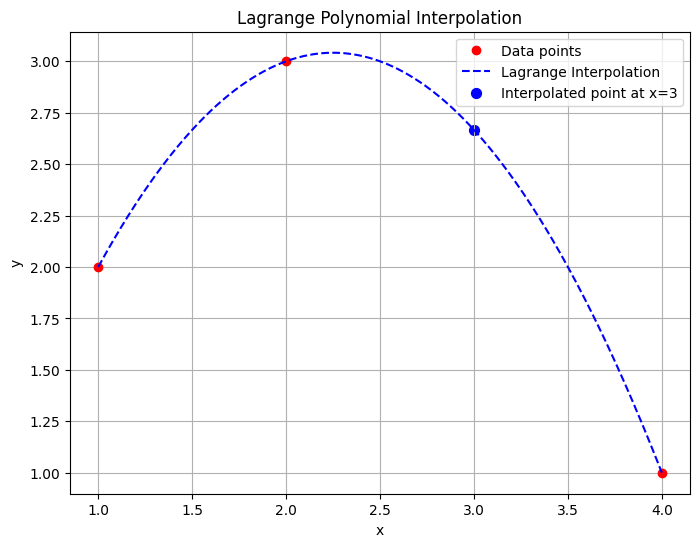

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 라그랑지 보간법 클래스로 구현
class LagrangeInterpolation:
    def __init__(self, x_values, y_values):
        self.x_values = np.array(x_values)
        self.y_values = np.array(y_values)

    def interpolate(self, x):
        """
        주어진 x 값에서 보간된 y 값을 계산
        """
        n = len(self.x_values)
        result = 0
        for i in range(n):
            term = self.y_values[i]
            for j in range(n):
                if i != j:
                    term *= (x - self.x_values[j]) / (self.x_values[i] - self.x_values[j])
            result += term
        return result

    def plot(self, x_interp_points=1000, x_test=None):
        """
        보간법 시각화 함수. 주어진 데이터 포인트들과 보간된 곡선을 시각화합니다.
        """
        # 보간할 x 좌표들 (보간함수의 모양을 그리기 위해)
        x_interp = np.linspace(min(self.x_values), max(self.x_values), x_interp_points)
        y_interp = np.array([self.interpolate(x) for x in x_interp])

        # 그래프 시각화
        plt.figure(figsize=(8, 6))
        plt.plot(self.x_values, self.y_values, 'ro', label='Data points')  # 데이터 포인트
        plt.plot(x_interp, y_interp, 'b--', label='Lagrange Interpolation')  # 보간 결과
        
        # 보간된 특정 x_test 값이 있는 경우, 해당 점을 표시
        if x_test is not None:
            y_test = self.interpolate(x_test)
            plt.scatter(x=x_test, y=y_test, s=50, c='b', label=f'Interpolated point at x={x_test}', marker='o')

        plt.title("Lagrange Polynomial Interpolation")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()


# 데이터 포인트 설정
x_data = [1, 2, 4]
y_data = [2, 3, 1]

# 라그랑지 보간법 클래스 인스턴스 생성 및 시각화
lagrange_interp = LagrangeInterpolation(x_data, y_data)

# 특정 x 값에서의 보간값 계산 (예시: x = 3에서의 보간값)
x_test = 3
lagrange_interp.plot(x_test=x_test)  # 보간 곡선 시각화 및 특정 보간점 표시

## 예제

### 교재 예제

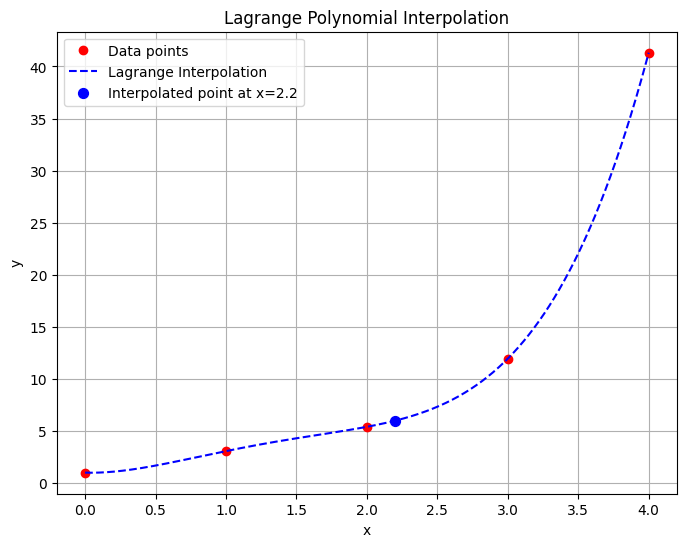

5.988016000000001

In [16]:
LIP = LagrangeInterpolation(x_values=[0.0,1.0,2.0,3.0,4.0], y_values=[1.0,3.07,5.4,11.95,41.32])
LIP.plot(x_test=2.2)
LIP.interpolate(x=2.2)

__C코드 정답__

```C
  x = 2.200000 : f(x) = 5.988016
```

### 로그함수 근사하기

In [30]:
for i in range(1, 21):
    lip = LagrangeInterpolation(x_values=np.linspace(1,5,i), y_values=np.log(np.linspace(1,5,i)))
    print(f'{i}개의 데이터로 근사한 x=2에서의 값: {lip.interpolate(x=2)}')

1개의 데이터로 근사한 x=2에서의 값: 0.0
2개의 데이터로 근사한 x=2에서의 값: 0.40235947810852507
3개의 데이터로 근사한 x=2에서의 값: 0.6227794774468197
4개의 데이터로 근사한 x=2에서의 값: 0.682435626116609
5개의 데이터로 근사한 x=2에서의 값: 0.6931471805599453
6개의 데이터로 근사한 x=2에서의 값: 0.6937805477915459
7개의 데이터로 근사한 x=2에서의 값: 0.6933786623844324
8개의 데이터로 근사한 x=2에서의 값: 0.6931905104600028
9개의 데이터로 근사한 x=2에서의 값: 0.6931471805599453
10개의 데이터로 근사한 x=2에서의 값: 0.6931439902337211
11개의 데이터로 근사한 x=2에서의 값: 0.6931459342254549
12개의 데이터로 근사한 x=2에서의 값: 0.6931469349219456
13개의 데이터로 근사한 x=2에서의 값: 0.6931471805599453
14개의 데이터로 근사한 x=2에서의 값: 0.6931472000520922
15개의 데이터로 근사한 x=2에서의 값: 0.693147188391894
16개의 데이터로 근사한 x=2에서의 값: 0.693147182140762
17개의 데이터로 근사한 x=2에서의 값: 0.6931471805599453
18개의 데이터로 근사한 x=2에서의 값: 0.6931471804296112
19개의 데이터로 근사한 x=2에서의 값: 0.6931471805067537
20개의 데이터로 근사한 x=2에서의 값: 0.69314718054906


__C 코드__
```C
#include <stdio.h>
#include <math.h>
 
 /* nd: number of data */
 /* n = nd-1           */
 
/*#define nd 5
double xd[nd]={0.0,1.0,2.0,3.0,4.0};
double fd[nd]={1.0,3.07,5.4,11.95,41.32}; */

#define nd 7
double xd[nd] = {1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0};
double fd[nd] = {log(1.0), log(3.0), log(4.0), log(5.0), log(6.0), log(7.0), log(8.0)};

main()
{
	FILE *out1;
	out1=fopen("lagrange interpolation_II-1-1.dat","w");

    int n,i,j;
    double p,sum,f_x;
    double x,y;
   
   	n = nd-1;
 	x = 2;
 	sum=0.0;
 	f_x=0.0;
    
    for(i=0;i<=n;i++)
    {
        p=1;
        for(j=0;j<=n;j++)
        {
            if(i!=j)
            p=p*(x-xd[j])/(xd[i]-xd[j]);
        }
            sum=sum+p*fd[i];
    }
   
   f_x = sum;
   
   fprintf(out1,"  x = %f : f(x) = %f", x, f_x);
 
   fclose(out1);
}

result :   x = 2.000000 : f(x) = 0.685123
```

### 온도에 따른 밀도 변화

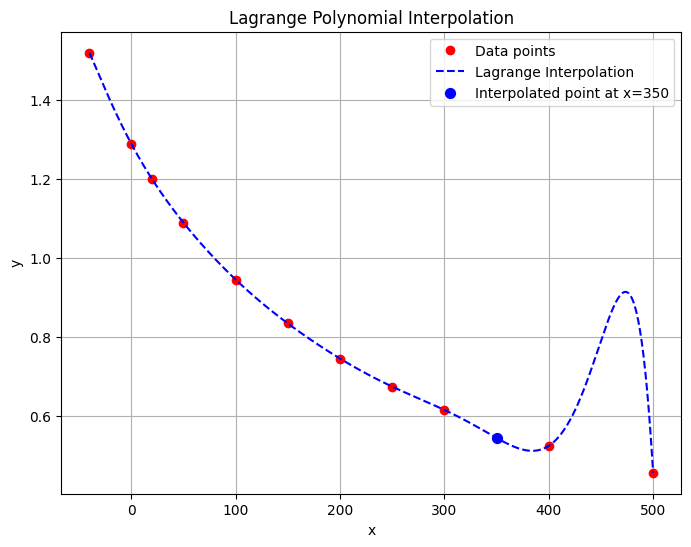

0.5449722376654181

In [33]:
lip = LagrangeInterpolation(x_values=[-40.0, 0.0, 20.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0],
                            y_values=[1.52, 1.29, 1.20, 1.09, 0.946, 0.835, 0.746, 0.675, 0.616, 0.525, 0.457])
lip.plot(x_test=350)
lip.interpolate(x=350)

__C 결과__
```C   
x = 350.000000 : f(x) = 0.544972
```

In [35]:
for i in range(4, 12):
    lip = LagrangeInterpolation(x_values=[-40.0, 0.0, 20.0, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 400.0, 500.0][:i],
                                y_values=[1.52, 1.29, 1.20, 1.09, 0.946, 0.835, 0.746, 0.675, 0.616, 0.525, 0.457][:i])
    print(f'데이터가 {i} 개일 때 보간: {lip.interpolate(x=350)}')

데이터가 4 개일 때 보간: 0.03583333333341443
데이터가 5 개일 때 보간: -2.0912916666669332
데이터가 6 개일 때 보간: 5.859464912281368
데이터가 7 개일 때 보간: -4.046686403509241
데이터가 8 개일 때 보간: 2.645179719351109
데이터가 9 개일 때 보간: 0.16148539932811534
데이터가 10 개일 때 보간: 0.5064317354915692
데이터가 11 개일 때 보간: 0.5449722376654181
